# 1 - Dependencies management

## Theory [2]

We will start with a few theoretical questions:

* [0.5] What is conda? How it differs from apt, yarn, and others? Additionally, discuss the role of Mamba in the Conda ecosystem. How does Mamba improve upon Conda, and what are the potential benefits and drawbacks of using Mamba over Conda?

* [0.5] What is Docker, and how it differs from dependencies management systems? From virtual machines?

* [0.5] What are the advantages and disadvantages of using containers over other approaches?

* [0.5] Explain how Docker works: what are Dockerfiles, how are containers created, and how are they run and destroyed?




- What is conda?

  Conda is a cross-platform, language-agnostic package and environment manager. Unlike package managers like apt or yum which are system-level, Conda is designed for software environments, especially in data science, bioinformatics, and machine learning.

  Comparison:
  - Conda vs. apt (or yum):
    
    apt is OS-specific (Ubuntu/Debian) and manages system libraries.
    
    Conda is cross-platform and works on a user-level for software dependencies.
    
    Conda allows isolated environments, whereas apt changes the entire system.
  
  - Conda vs. yarn:

    yarn is JavaScript/Node.js specific. Conda supports Python, R, and more.
    
    yarn optimizes for JS library installation speed; Conda handles binary dependencies.

  - Conda Channels:
    Key to its flexibility, allowing access to packages from conda-forge, bioconda, etc.

  Mamba is a reimplementation of Conda in C++. It addresses Conda's slowness by improving dependency resolution and installation performance.

  - Benefits of Mamba:
    Faster dependency resolution due to C++ optimization.
    
    Reduced overhead in creating environments.
  - Drawbacks:
    Newer and may not yet match Conda's extensive compatibility.

- What is Docker?

  Docker is a containerization tool that packages applications and dependencies into lightweight, isolated containers. It fundamentally differs from virtual machines (VMs) and dependency managers.

  - Docker vs. Dependency Managers:
    
    Dependency managers (Conda, pip) focus on application libraries. Docker handles entire runtime environments.

    Docker eliminates "dependency hell" by isolating the application entirely.

  - Docker vs. Virtual Machines:
    
    Containers are lightweight and share the host OS kernel, while VMs emulate entire operating systems.

    Containers start in milliseconds, whereas VMs take longer.

- Advantages and disadvantages of using containers

  - Advantages:

    Portability: Runs consistently across environments.
    Resource efficiency: Minimal overhead compared to VMs.
    
    Scalability: Ideal for microservices.
  - Disadvantages:

    Security: Containers share the host OS kernel, increasing vulnerability.

    Complexity: Requires understanding Dockerfiles and orchestration tools.

- Docker mechanics

  Docker operates via Dockerfiles, which define how containers are built. Containers can be created, run, and destroyed interactively or via scripts.

## Problem [6.25]

The problem itself is relatively simple.

Imagine that you developed an excellent RNA-seq analysis pipeline and want to share it with the world. Based on your experience, you are confident that the popularity of the pipeline will be proportional to its ease of use. So, you decided to help your future users and to pack all dependencies in a Conda environment and a Docker container.

Here is the list of tools and their versions that are used in your work:
* [fastqc](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/), v0.11.9
* [bcftools](https://github.com/samtools/bcftools), v1.18
* [samtools](https://github.com/samtools/samtools), v1.16.1
* [multiqc](https://github.com/ewels/MultiQC), v1.13


I'm using Windows, so everything will start from Installing WSL

In [ ]:
# Enable WSL: Open PowerShell as Administrator and run:
wsl --install Ubuntu --web-download

# Verify Installation: After rebooting, check the version:
wsl --list --verbose

# Install Docker in WSL:
# In Docker Desktop settings, enable "Ubuntu" under "Enable integration with additional distros:" in Settings -> Resources -> WSL integration
# Link Docker to WSL
wsl --set-default-version 2


**Anaconda**:

* [1] Install conda (or mamba it will be better), create a new virtual environment, and install all necessary packages.

*You won't be able to install some tools - that's fine. List their names, and explain what should be done to make them conda-friendly ([conda-forge](https://conda-forge.org/docs/maintainer/adding_pkgs.html) channel, [bioconda](https://bioconda.github.io/contributor/workflow.html) channel).*
* [0.5] Download the full human genome (e.g., GRCh38 or hg19) and index it using samtools. Write a simple script (should be executable) using samtools and bedtools:

    1.   Download a BAM file from the [1000 Genomes Project](https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/). Download only BAM file!
    2.   Index the downloaded BAM file.
    3.   Convert the BAM file to a sorted BAM file.
    4.   From the header of BAM file extract the info that you think is important and describe why.
* [0.25] Export the environment  to the file and verify that it can be rebuilt from the file without problems.

In [ ]:
# Download and install Miniconda (lightweight Conda distribution):
wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
bash Miniconda3-latest-Linux-x86_64.sh

# Restart the shell or source the Conda initialization script:
source ~/.bashrc

# Install mamba
conda install -n base -c conda-forge mamba

In [ ]:
# Create a new Conda environment using Mamba
mamba create -n rnaseq

# Activate the new environment
mamba activate rnaseq

# Try installing fastqc and multiqc first
mamba install fastqc=0.11.9 multiqc=1.13 -c bioconda -c conda-forge

# Attempt to install samtools and bcftools separately
mamba install samtools -c bioconda -c conda-forge
mamba install bcftools -c bioconda -c conda-forge

# Also it can be done in 1 line
mamba create -n rnaseq fastqc=0.11.9 multiqc=1.13 samtools bcftools -c bioconda -c conda-forge # but i had some issues doing it this way

For all this packages we should use bioconda channel:

[Fastqc](https://anaconda.org/bioconda/fastqc)

[Multiqc](https://anaconda.org/bioconda/multiqc)

[Samtools](https://anaconda.org/bioconda/samtools)

[Bcftools](https://anaconda.org/bioconda/bcftools)

In [ ]:
# We can check correctness of installetion in the following way:
(rnaseq) vladmoz@Vladmoz:~$ fastqc --version
multiqc --version
samtools --version
bcftools --version

In [ ]:
# We got
FastQC v0.11.9
multiqc, version 1.13
samtools 1.16.1
bcftools 1.18

In [ ]:
# Download and index a human genome:
wget ftp://ftp.ensembl.org/pub/release-105/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz

gunzip Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz

samtools faidx Homo_sapiens.GRCh38.dna.primary_assembly.fa

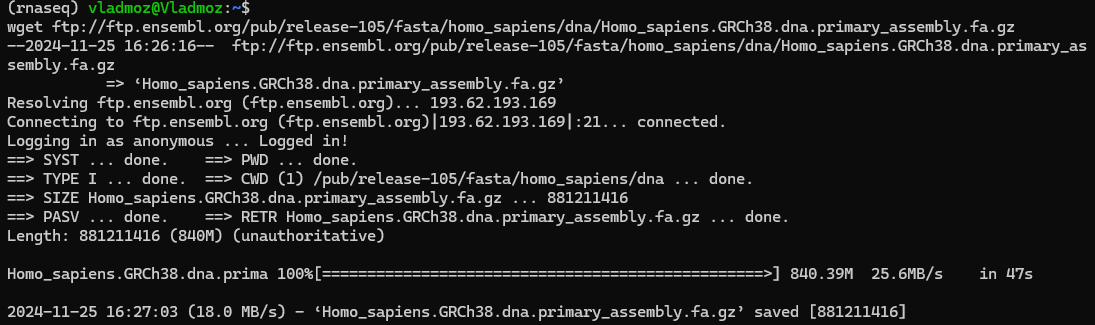

In [ ]:
# BAM file processing:
wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA12878/alignment/NA12878.chrom20.ILLUMINA.bwa.CEU.low_coverage.20121211.bam

samtools index NA12878.chrom20.ILLUMINA.bwa.CEU.low_coverage.20121211.bam

samtools sort NA12878.chrom20.ILLUMINA.bwa.CEU.low_coverage.20121211.bam -o sorted.bam

[Link to the folder with `.bam` file](https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA12878/alignment/)

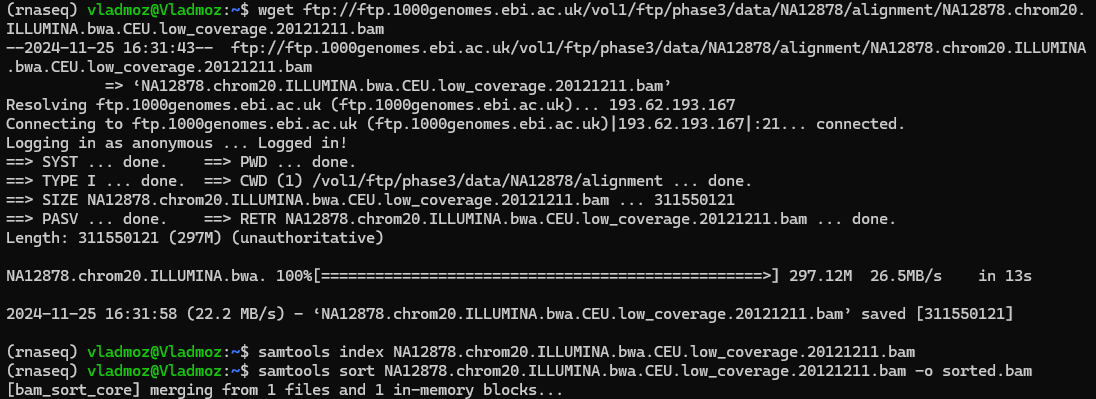

In [ ]:
# Get environment yml
mamba env export --name rnaseq > environment.yml

# We can use for better comatibility
mamba env export --name rnaseq --no-builds > environment.yml

You can [check it here](https://github.com/Vladm0z/HSE-Bioinformatics/blob/main/Bioinformatics/MSc/CompBio/environment.yml)


**Docker**:
* [3.5] Create a Dockerfile for a container with **all** required dependencies. Don't forget about comments; test that all tools are accessible and work inside the container. Repeat steps 1 -- 4 from Conda section, write a script for it. Hints:
 - You are not allowed to use conda or conda image here.
 - If needed, grant rights to execute downloaded/compiled binaries using chmod (`chmod a+x BINARY_NAME`)
 - Move all executables to $PATH folders (e.g.`/usr/local/bin`) to make them accessible without specifying the full path.
 - Typical command to run a container interactively and delete on exit.
* [1] Use [hadolint](https://hadolint.github.io/hadolint/) and remove as many reported warnings as possible.
* [0.5] Add relevant [labels](https://docs.docker.com/engine/reference/builder/#label), e.g. maintainer, version, etc. ([hint](https://medium.com/@chamilad/lets-make-your-docker-image-better-than-90-of-existing-ones-8b1e5de950d))

In [ ]:
# To create Dockerfile we will open editor:
nano Dockerfile

In [ ]:
# And Write this:

# Base image
FROM ubuntu:22.04

# Set noninteractive mode for apt
ENV DEBIAN_FRONTEND=noninteractive

# Install dependencies
RUN apt-get update && apt-get install -y \
    wget \
    fastqc \
    unzip \
    python3-pip \
    openjdk-11-jre \
    libbz2-dev \
    libcurl4-openssl-dev \
    liblzma-dev \
    zlib1g-dev \
    libncurses5-dev \
    && apt-get clean && rm -rf /var/lib/apt/lists/*

# Download and install tools
WORKDIR /tools

# Install bcftools version 1.18
# I used GitHub because apt-get/pip installs an older version (1.13)
RUN wget https://github.com/samtools/bcftools/releases/download/1.18/bcftools-1.18.tar.bz2 && \
    tar -xjf bcftools-1.18.tar.bz2 && \
    cd bcftools-1.18 && \
    make && \
    mv bcftools /usr/local/bin/ && \
    cd .. && \
    rm -rf bcftools-1.18*
# And because this package is stored as a .tar.bz2 file, we need to install the following libraries:
# libbz2-dev libcurl4-openssl-dev liblzma-dev zlib1g-dev

# Install samtools version 1.16.1
# I used GitHub because apt-get/pip installs an older version (1.13)
RUN wget https://github.com/samtools/samtools/releases/download/1.16.1/samtools-1.16.1.tar.bz2 && \
    tar -xjf samtools-1.16.1.tar.bz2 && \
    cd samtools-1.16.1 && \
    make && \
    mv samtools /usr/local/bin/ && \
    cd .. && \
    rm -rf samtools-1.16.1*
# Besdies some of the libraries that bcftools requires, samtools also requires libncurses5-dev

# Install MultiQC
RUN pip3 install multiqc==1.13

# Cleanup
RUN apt-get clean && rm -rf /var/lib/apt/lists/* /tmp/* /var/tmp/*

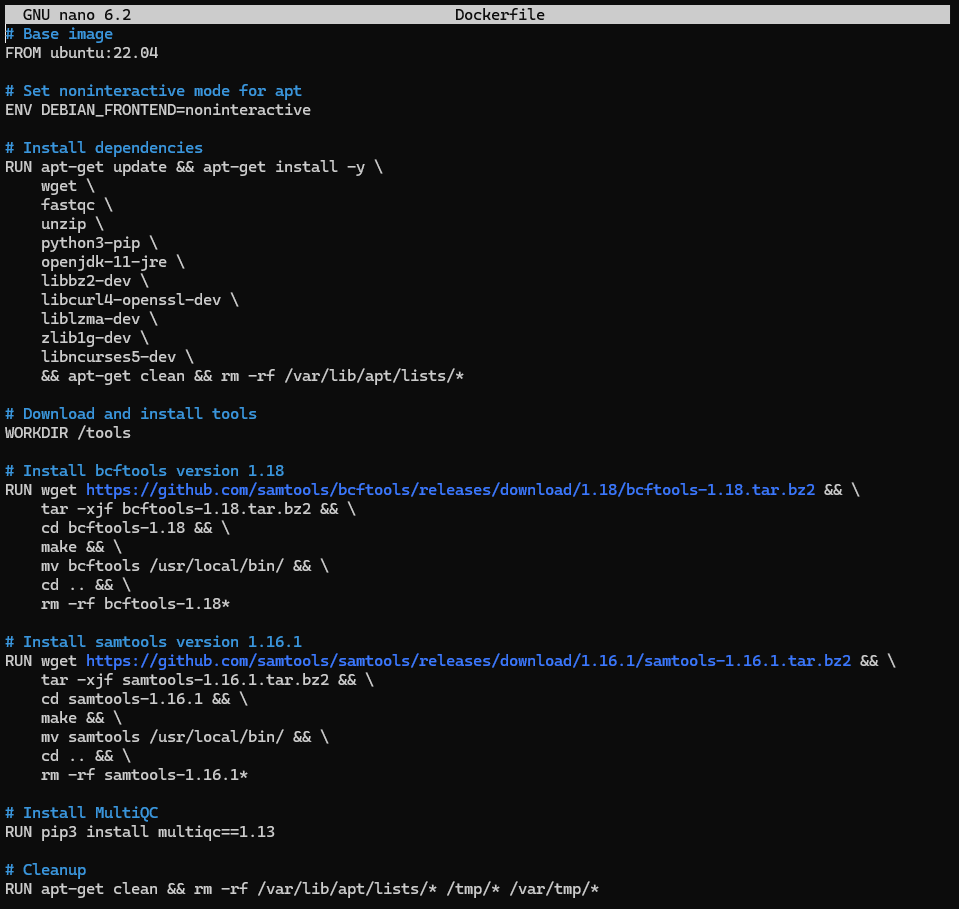

Then press `Ctrl+O` to save and `Ctrl+X` to exit

You can [check the file here](https://github.com/Vladm0z/HSE-Bioinformatics/blob/main/Bioinformatics/MSc/CompBio/Dockerfile_big)

In [ ]:
# Build the Docker Image:
docker build -t rnaseq_pipeline:1.0 .

# Run the Container:
docker run --rm -it rnaseq_pipeline:1.0 bash

# Verify Installed Tools: Inside the container, check that the tools are installed:
fastqc --version
multiqc --version
bcftools --version
samtools --version

# Or we can run
docker run -it rnaseq_pipeline:1.0 fastqc --version
docker run -it rnaseq_pipeline:1.0 multiqc --version
docker run -it rnaseq_pipeline:1.0 bcftools --version
docker run -it rnaseq_pipeline:1.0 samtools --version

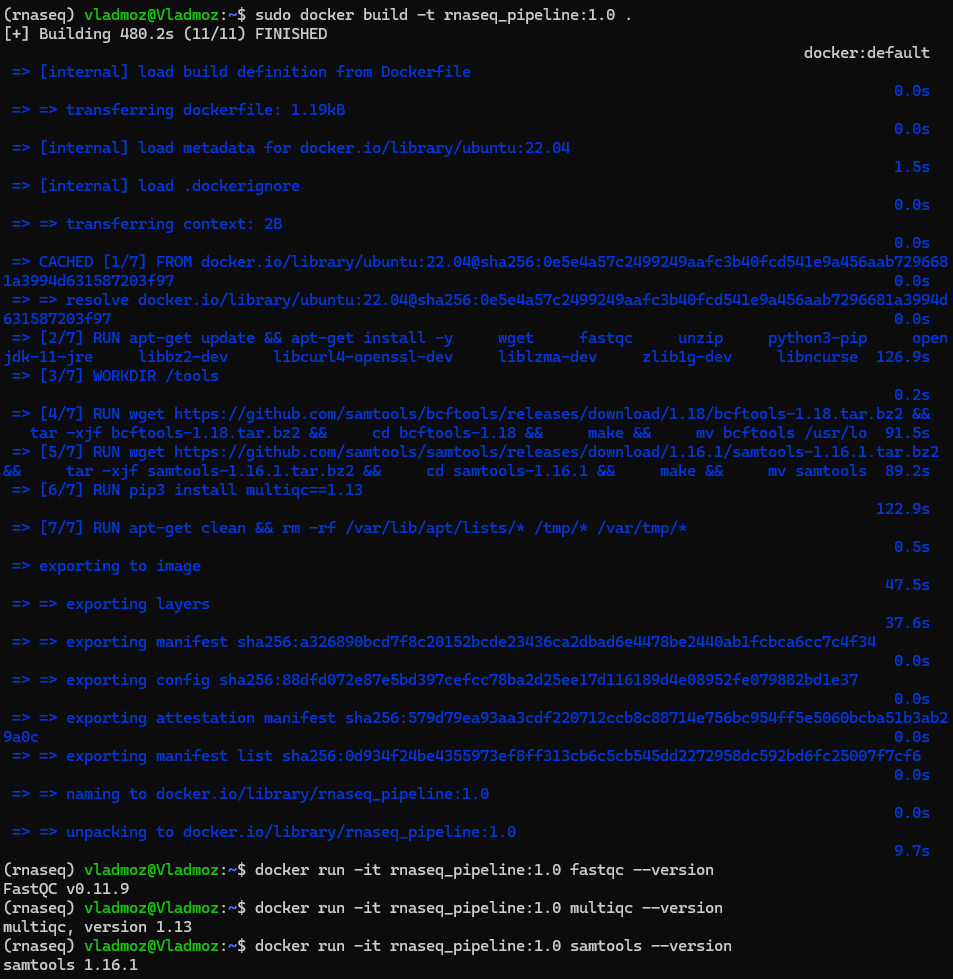

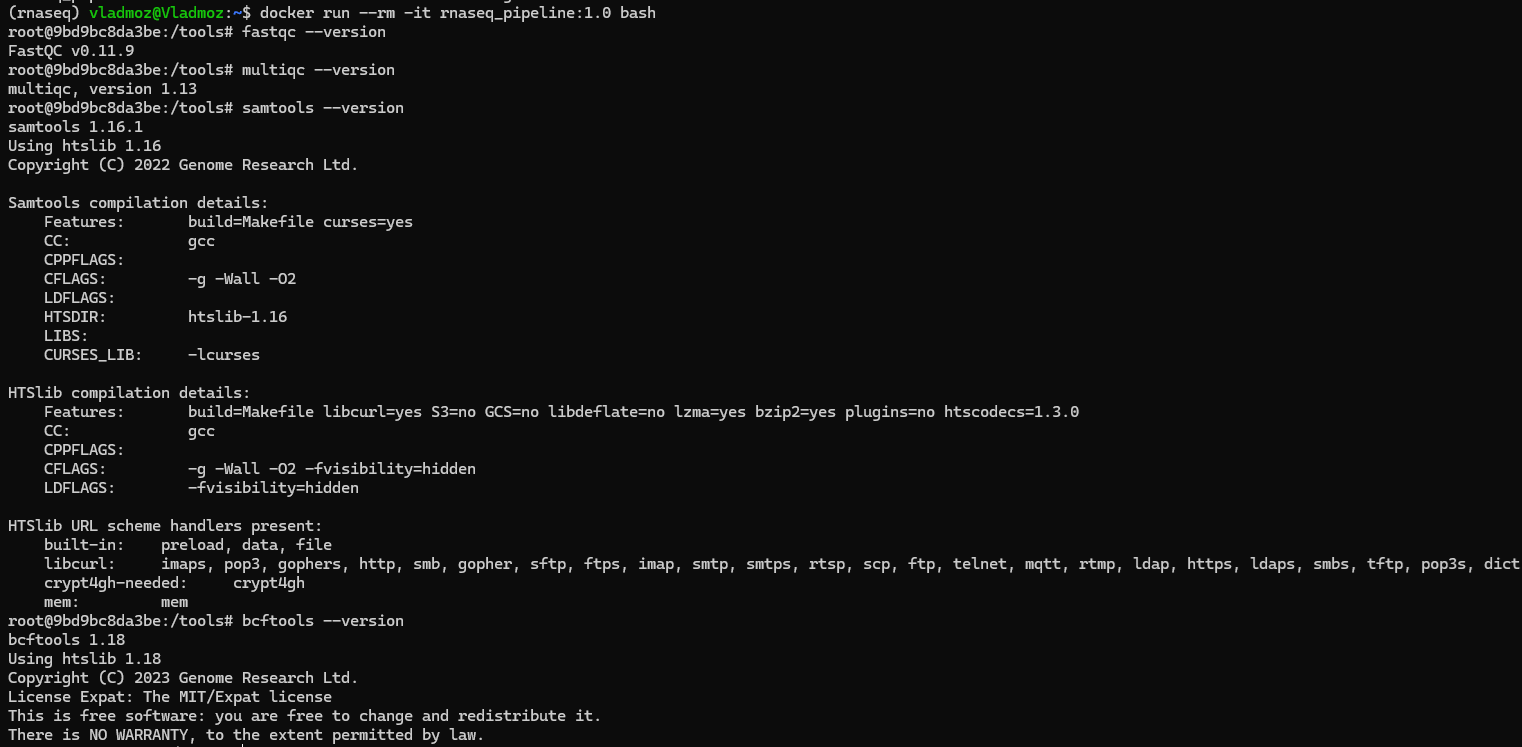

And it's size:

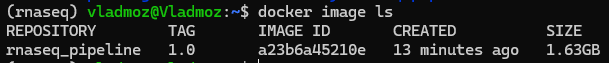

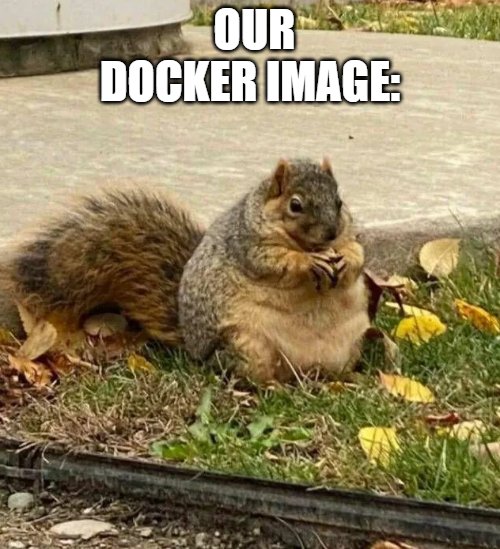

## Extra points [1.75]

You will be awarded extra points for the following:
* [1.25] Minimizing the size of the final Docker image. That is, removing all intermediates, unnecessary binaries/caches, etc. Don't forget to compare & report the final size before and after all the optimizations.

* [0.4] Create an extra Dockerfile that starts from [a conda base image](https://hub.docker.com/r/continuumio/anaconda3) and builds everything from your conda environment file.

Hint: `conda env create --quiet -f environment.yml && conda clean -a` ([example](https://github.com/nf-core/clipseq/blob/master/Dockerfile))

* [0.1] Share a meme about Docker or your impression of this assignment


We can reduce it further:

In [ ]:
# Base image
FROM ubuntu:22.04

# Set noninteractive mode for apt
ENV DEBIAN_FRONTEND=noninteractive

# Install essential dependencies and clean up
RUN apt-get update && apt-get install -y --no-install-recommends \
    wget \
    fastqc \
    python3-pip \
    unzip \
    bzip2 \
    libbz2-dev \
    libcurl4-openssl-dev \
    zlib1g-dev \
    libncurses5-dev \
    liblzma-dev \
    build-essential && \
    wget -qO- https://github.com/samtools/bcftools/releases/download/1.18/bcftools-1.18.tar.bz2 | tar -xj && \
    cd bcftools-1.18 && \
    make && \
    mv bcftools /usr/local/bin/ && \
    cd .. && rm -rf bcftools-1.18* && \
    wget -qO- https://github.com/samtools/samtools/releases/download/1.16.1/samtools-1.16.1.tar.bz2 | tar -xj && \
    cd samtools-1.16.1 && \
    make && \
    mv samtools /usr/local/bin/ && \
    cd .. && rm -rf samtools-1.16.1* && \
    pip3 install --no-cache-dir multiqc==1.13 && \
    apt-get remove -y --purge build-essential && \
    apt-get autoremove -y && apt-get clean && \
    rm -rf /var/lib/apt/lists/* /tmp/* /var/tmp/*

# Set the working directory for future commands
WORKDIR /tools

You can [check the file here](https://github.com/Vladm0z/HSE-Bioinformatics/blob/main/Bioinformatics/MSc/CompBio/Dockerfile)

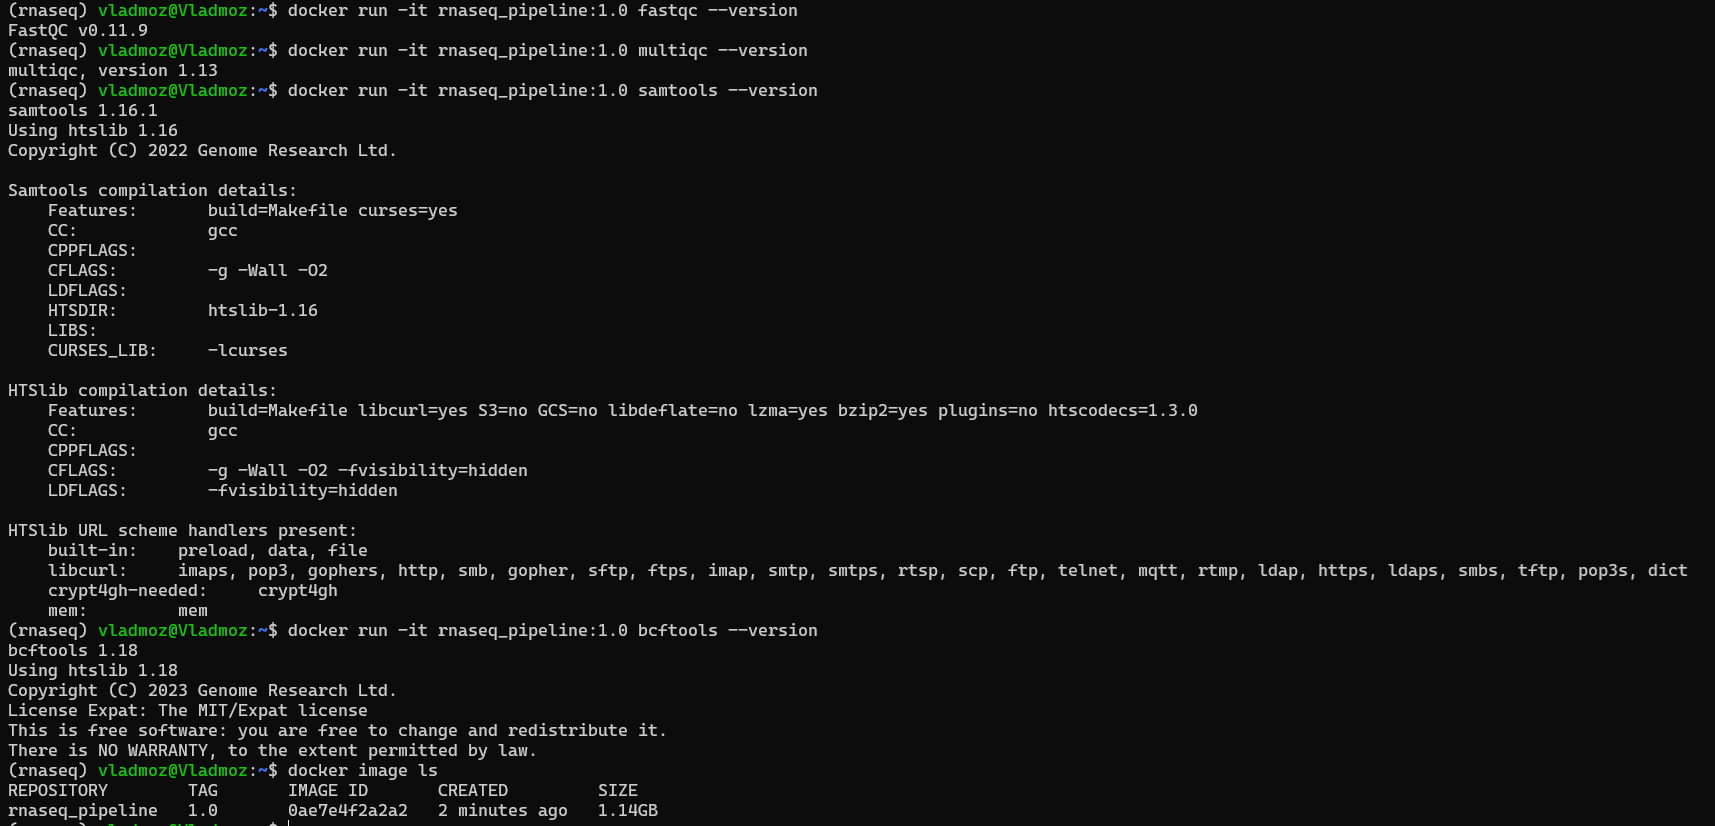

We can create Dockerfile that starts from a conda base image and builds everything from your conda environment file.

In [ ]:
# Use Miniconda base image
FROM continuumio/miniconda3:latest

# Set noninteractive mode for apt-get
ENV DEBIAN_FRONTEND=noninteractive

# Copy the environment.yml file to the container
COPY environment.yml /tmp/environment.yml

# Create a Conda environment from the environment file and clean up
RUN conda env create --quiet -f /tmp/environment.yml && \
    conda clean -a -y && \
    rm -rf /tmp/*

# Activate the Conda environment
SHELL ["conda", "run", "-n", "myenv", "/bin/bash", "-c"]

# Set the working directory for future commands
WORKDIR /tools